This code is Under Work Stage to pre process data to MFCCs and their Deltas and create a data stream for input

In [5]:
import math
import random
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle
import pandas as pd

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [6]:
data_dir = 'pre-processed/'
labels_df_path = '{}df_iemocap.csv'.format(data_dir)
audio_vectors_path = '{}audio_vectors_1.pkl'.format(data_dir)

In [7]:
labels_df = pd.read_csv(labels_df_path)
audio_vectors = pickle.load(open(audio_vectors_path, 'rb'))

962    sad
Name: emotion, dtype: object


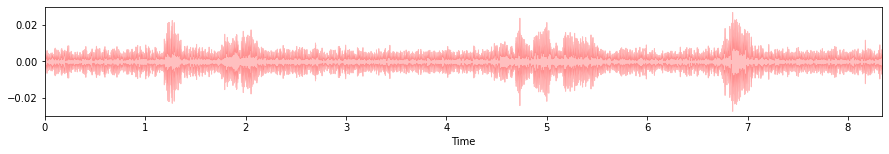

In [8]:
# Pick a Random File
random_file_name = list(audio_vectors.keys())[random.choice(range(len(audio_vectors.keys())))]
y = audio_vectors[random_file_name]
sr = 44100

plt.figure(figsize=(15,2))
librosa.display.waveplot(y, sr=sr, max_sr=1000, alpha=0.25, color='r')

filter = labels_df['wav_file']== random_file_name
  
# filtering data
print(labels_df[filter].emotion)

import IPython.display as ipd
ipd.Audio(y, rate=sr)

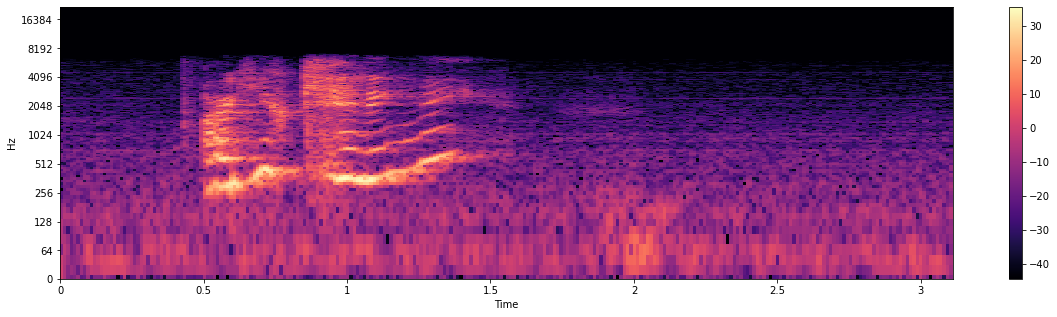

In [7]:
# Short Term Forier Transform with Log frequency axis
Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(abs(Y))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

ValueError: x and y must have same first dimension, but have shapes (137152,) and (1, 268)

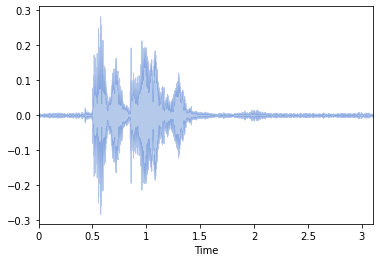

In [16]:
import sklearn
T = len(y)/sr    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable

#  centroid[t] = sum_k S[k, t] * freq[k] / (sum_j S[j, t])
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

#min = minimum value for each row of the vector signal
#max = maximum value for each row of the vector signal
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(cent), color='r')

### Pre-emphasis
Pre-emphasis is done before starting with feature extraction. We do this by boosting only the signal’s high-frequency components, while leaving the low-frequency components in their original states. This is done in order to compensate the high-frequency section, which is suppressed naturally when humans make sounds.

Text(0.5, 1.0, 'Original signal')

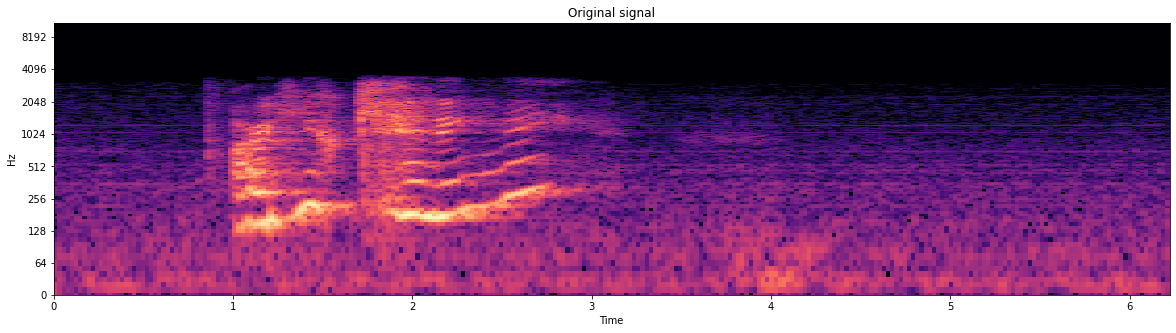

In [18]:
import matplotlib.pyplot as plt

y_filt = librosa.effects.preemphasis(y)
# and plot the results for comparison
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max)

plt.figure(figsize=(20, 5))
librosa.display.specshow(S_orig, y_axis='log', x_axis='time')
plt.title('Original signal')


Text(0.5, 1.0, 'Pre-emphasized signal')

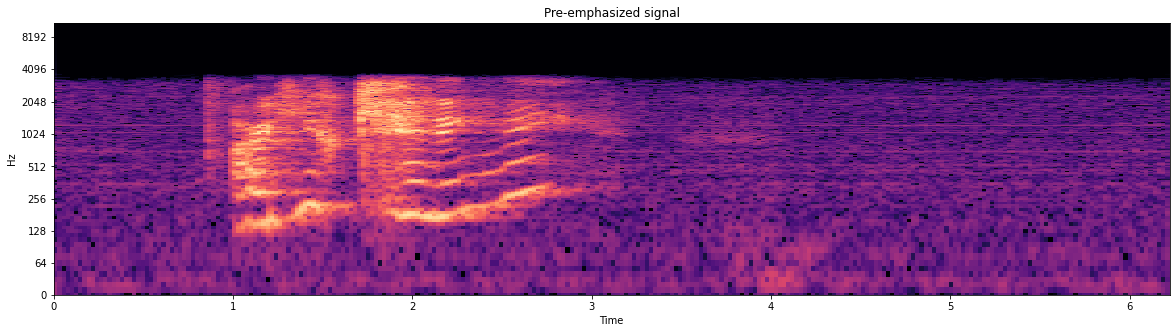

In [19]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(S_preemph, y_axis='log', x_axis='time')
plt.title('Pre-emphasized signal')

# Extracting MFCCs

In [20]:
mfccs = librosa.feature.mfcc(y=y, n_mfcc=13, sr=sr)

In [21]:
mfccs.shape

(13, 268)

In [23]:
len(y)/sr

3.1100226757369613

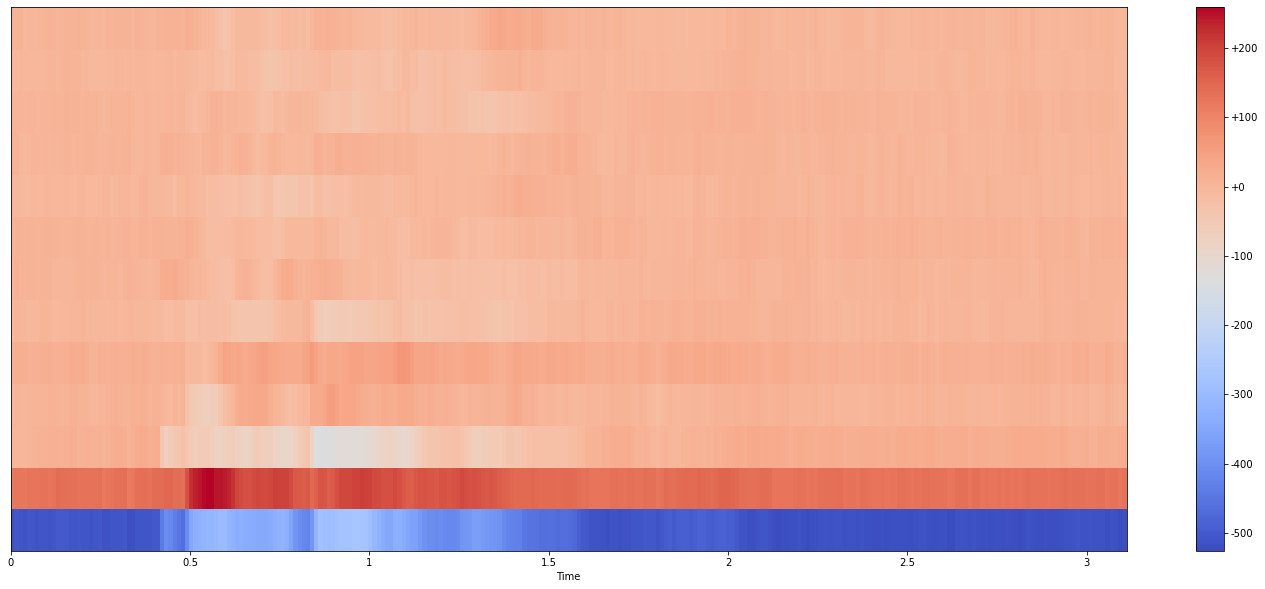

In [24]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [25]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
mfccs_features.shape

(39, 268)

In [26]:
mfccs = librosa.feature.mfcc(y=y, n_mfcc=13, sr=sr)

AttributeError: module 'librosa.feature' has no attribute 'mfmc'